In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We are reading our data
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<h2> About the dataset¶

Attribute Informations:
age (in years)

sex (0=female, 1=male)

cp : chest pain type (4 values)

trestbps : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol : serum cholestoral in mg/dl

fbs : fasting blood sugar > 120 mg/dl (1=true, 0=false)

restecg : resting electrocardiographic results (values 0,1,2)

thalach : maximum heart rate achieved

exang : exercise induced angina (1=yes, 0=no)

oldpeak : ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by fluorosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target : 1 = heart disease ; 0 = no heart disease

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# def thresholds(dataframe, col_name):
#     Q1 = dataframe[col_name].quantile(0.25)
#     Q3 = dataframe[col_name].quantile(0.75)
#     IQR = Q3 - Q1
#     upper = Q3 + 1.5 * IQR
#     lower = Q1 - 1.5 * IQR
#     dataframe.loc[(dataframe[col_name] < lower), col_name] = lower
#     dataframe.loc[(dataframe[col_name] > upper), col_name] = upper
#     return dataframe

In [7]:
# outlier = ["chol","oldpeak"]
# for i in outlier:
#     df=thresholds(df, i)

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


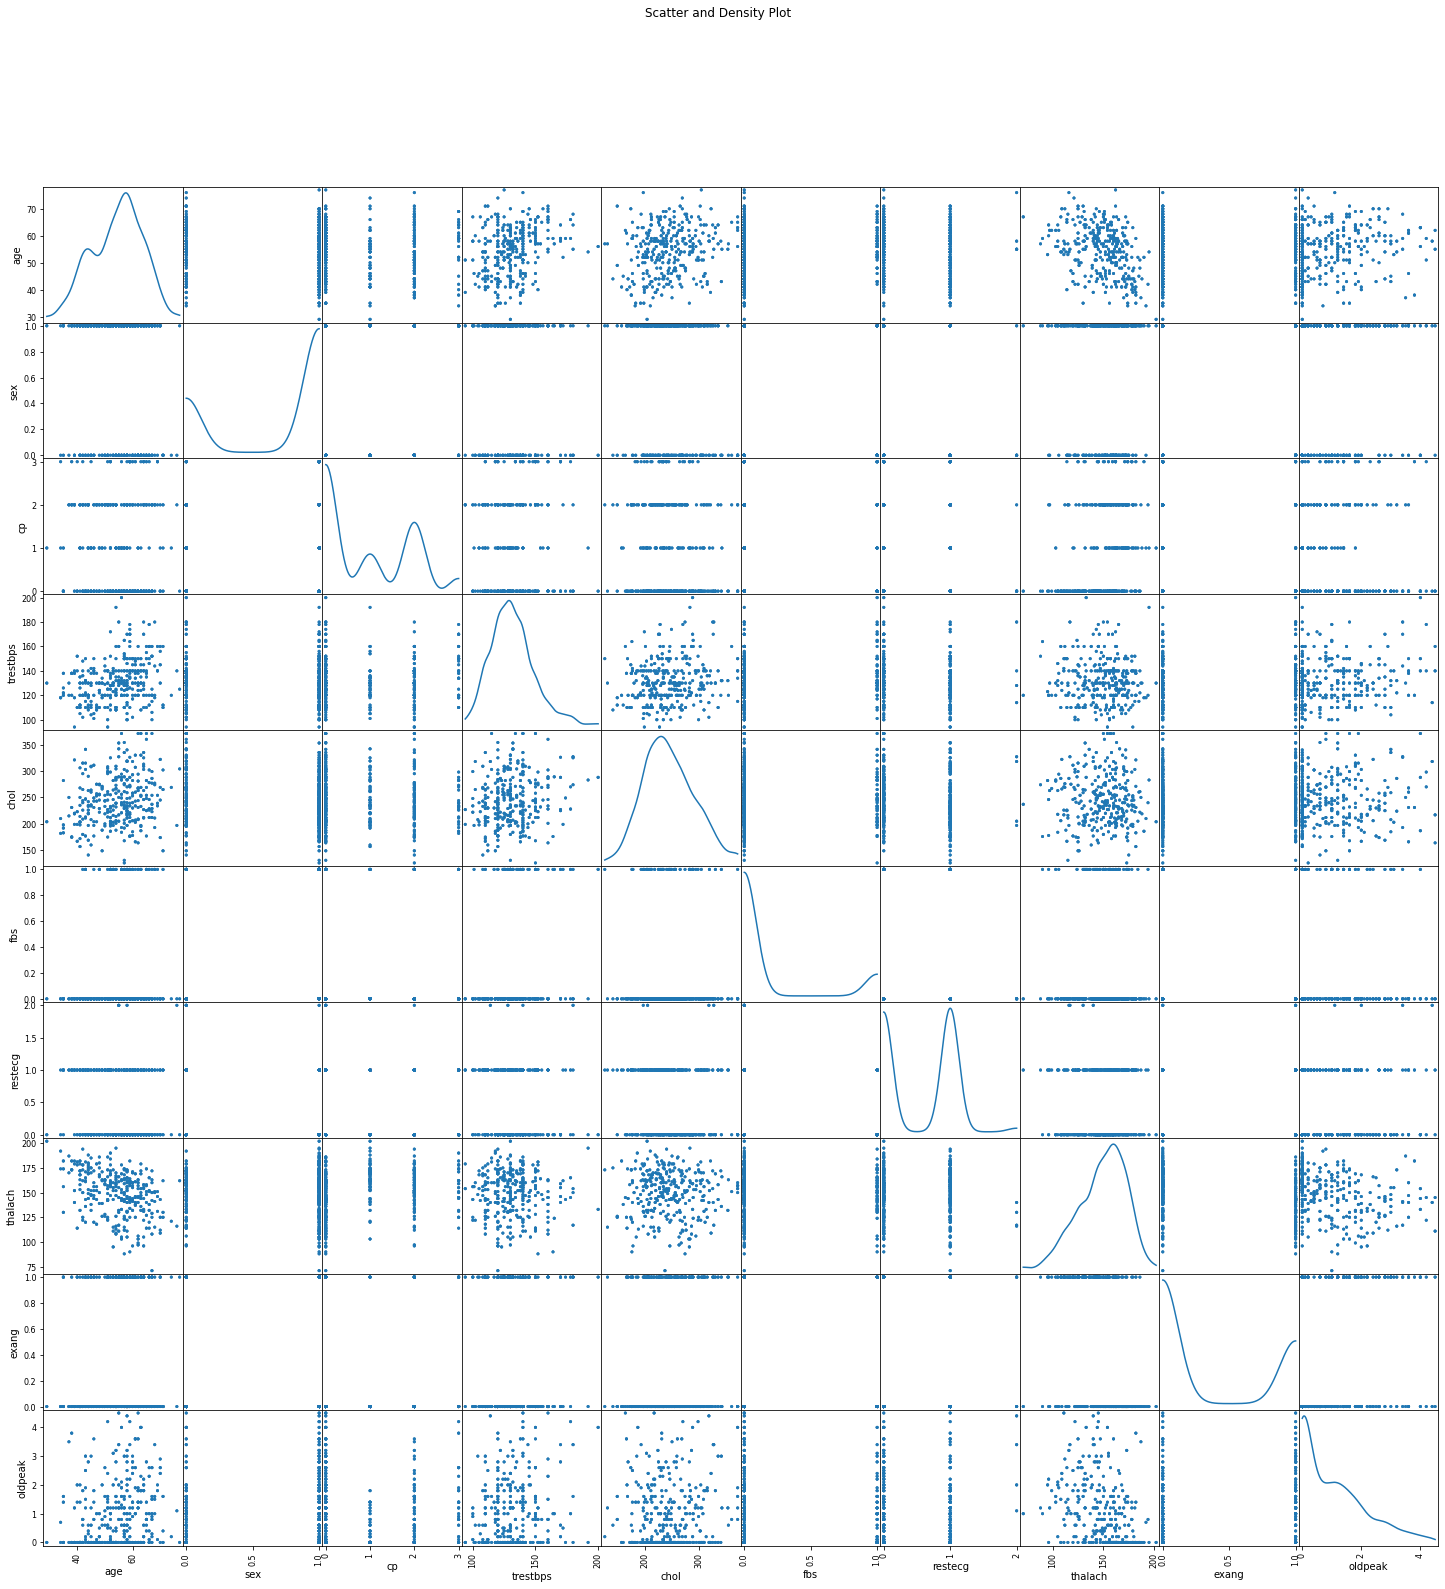

In [9]:
plotScatterMatrix(df, 25, 20)

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Data', fontsize=15)
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


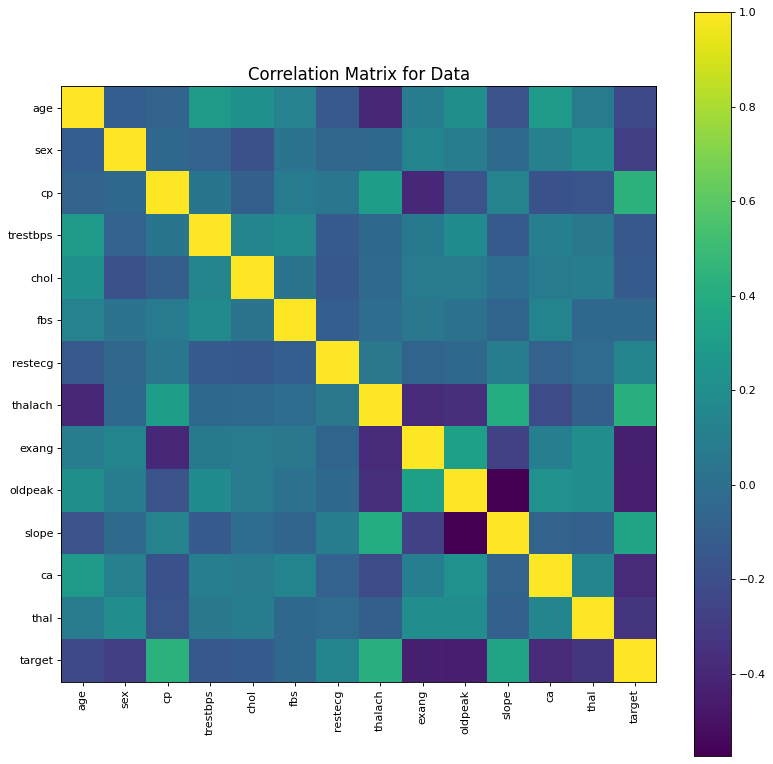

In [11]:
plotCorrelationMatrix(df, 12)

In [12]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

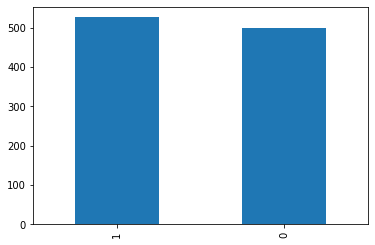

In [13]:
df['target'].value_counts().plot(kind='bar')

In [14]:
df.isnull().sum().sum() #checking missing value

0

<h3> Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='target',axis=1)
Y=df['target']

In [16]:
print(X.shape, Y.shape)

(1025, 13) (1025,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

<h2> Checking the performances of Classifier Algorithms

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report


<h3> Decision Tree Classifier

In [53]:
accuracyDecision = []
for i in np.arange(2,50):
    decision_tree = DecisionTreeClassifier(max_leaf_nodes=i, random_state=0)
    decision_tree.fit(X_train, y_train)
    pred = decision_tree.predict(X_test)
    accuracy_ti = accuracy_score(y_true = y_test, y_pred = pred)*100
    accuracyDecision.append(accuracy_ti)

Text(0, 0.5, 'Accuracy (%)')

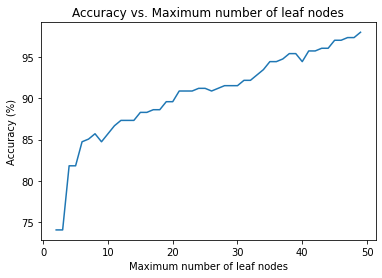

In [54]:
%matplotlib inline
plt.plot(np.arange(2,50),accuracyDecision)
plt.title('Accuracy vs. Maximum number of leaf nodes')
plt.xlabel('Maximum number of leaf nodes')
plt.ylabel('Accuracy (%)')

<h5> Leaf Nodes were chosen as 11 because of getting high accuracy as well as preventing overfitting

In [55]:
tree_classifier = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
tree_classifier.fit(X_train, y_train)
pred =tree_classifier.predict(X_test)
accuracy = accuracy_score(y_true = y_test, y_pred = pred)
confMatrix=confusion_matrix(y_test,pred)


print('Decision tree with 11 leaf nodes accuracy:', accuracy)
print('decision tree with 11 leaf nodes confusion matrix:\n', confMatrix)

Decision tree with 11 leaf nodes accuracy: 0.8668831168831169
decision tree with 11 leaf nodes confusion matrix:
 [[127  23]
 [ 18 140]]


<h3> Random Forest Classifier

In [59]:
accuracy_RFC=[]
for i in np.arange(1,15):
    rf_i = RandomForestClassifier(random_state=3,max_depth=i)
    rf_i.fit(X_train, y_train)
    pred_rfi = rf_i.predict(X_test)
    accuracy_rfi =accuracy_score(y_test,pred_rfi)
    accuracy_RFC.append(accuracy_rfi)

Text(0, 0.5, 'Accuracy (%)')

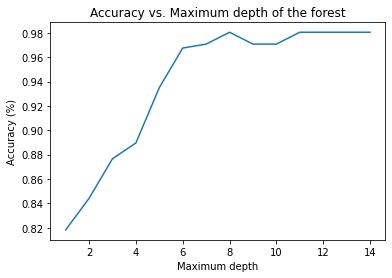

In [60]:
%matplotlib inline
plt.plot(np.arange(1,15),accuracy_RFC)
plt.title('Accuracy vs. Maximum depth of the forest')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy (%)')

In [67]:
#Accuracy for the max depth at the elbow of the curve
rf_classifier = RandomForestClassifier(random_state=3,max_depth=7)
rf_classifier.fit(X_train, y_train)
pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test,pred_rf)
confMatrix_rf = confusion_matrix(y_test,pred_rf)
print('random forest with a max depth of 7, accuracy:', accuracy_rf)
print('random forest with a max depth of 7, confusion matrix:\n', confMatrix_rf)

random forest with a max depth of 7, accuracy: 0.9707792207792207
random forest with a max depth of 7, confusion matrix:
 [[147   3]
 [  6 152]]


<h3> KNN (k-nearest neighbors)

In [69]:
accuracy_kNN=[]
for i in np.arange(1,25):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_knni = knn_i.predict(X_test)
    accuracy_knni =accuracy_score(y_test,pred_knni)
    accuracy_kNN.append(accuracy_knni)

Text(0, 0.5, 'Accuracy (%)')

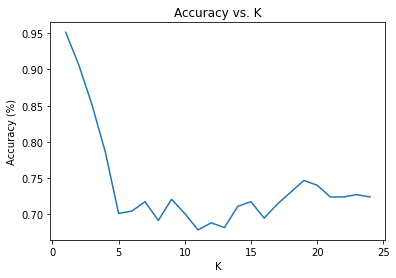

In [70]:
%matplotlib inline
plt.plot(np.arange(1,25),Accuracies_KNN)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')

In [72]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)
pred_knn = knn_classifier14.predict(X_test)
accuracy_knn =accuracy_score(y_test,pred_knn)
confMatrix_knn=confusion_matrix(y_test,pred_knn)
print('14-NN, confusion matrix:\n', confMatrix_knn)
print('14-NN, accuracy:\n', accuracy_knn)

14-NN, confusion matrix:
 [[112  38]
 [ 40 118]]
14-NN, accuracy:
 0.7467532467532467


<h4> The best accuracy score was 0.971 with Random Forest Classifier.